In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
pd.options.display.max_rows = 10

In [6]:
df = pd.read_csv("photo_train.csv")
df

,Unnamed: 0,path,label,0,1,2,3,4,5,6,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,Unknown_0.51_2021-01-14 15-03-16.jpg,5,151.0,151.0,151.0,150.0,150.0,150.0,149.0,...,152.0,152.0,151.0,151.0,150.0,150.0,150.0,152.0,152.0,152.0
1,1,Unknown_0.51_2021-01-14 15-31-34.jpg,4,152.0,152.0,152.0,152.0,152.0,152.0,152.0,...,149.0,149.0,149.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
2,2,Unknown_0.51_2021-01-14 16-03-51.jpg,2,149.0,149.0,149.0,149.0,149.0,149.0,149.0,...,150.0,150.0,152.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0
3,3,Unknown_0.51_2021-01-14 16-33-42.jpg,2,148.0,148.0,148.0,148.0,148.0,148.0,148.0,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
4,4,Unknown_0.51_2021-01-14 16-42-36.jpg,5,151.0,151.0,151.0,151.0,151.0,151.0,150.0,...,147.0,147.0,147.0,148.0,151.0,151.0,151.0,151.0,151.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2005,Unknown_0.9_2021-01-18 16-33-38.jpg,1,149.0,149.0,149.0,149.0,152.0,152.0,152.0,...,152.0,152.0,152.0,152.0,152.0,151.0,148.0,148.0,148.0,148.0
2006,2006,Unknown_0.9_2021-01-18 16-35-28.jpg,1,148.0,148.0,148.0,148.0,150.0,151.0,151.0,...,149.0,151.0,152.0,152.0,152.0,150.0,147.0,147.0,147.0,147.0
2007,2007,Unknown_0.9_2021-01-18 16-44-18.jpg,2,150.0,150.0,150.0,150.0,150.0,150.0,150.0,...,149.0,149.0,149.0,154.0,156.0,156.0,156.0,156.0,156.0,156.0
2008,2008,Unknown_0.9_2021-01-18 16-54-14.jpg,5,150.0,150.0,150.0,150.0,150.0,150.0,150.0,...,148.0,148.0,148.0,148.0,148.0,150.0,150.0,150.0,150.0,150.0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 3:], df.iloc[:, 2], train_size=0.8, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1608, 10000)
(402, 10000)


In [12]:
import itertools


def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df


In [13]:
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 52.3 s


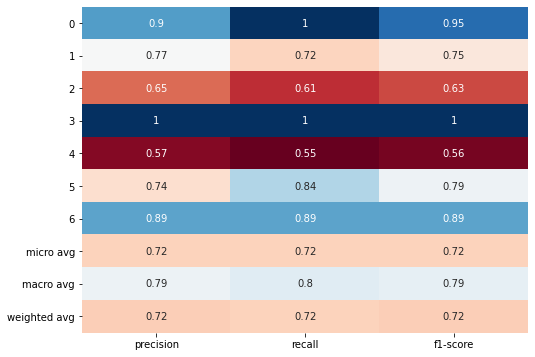

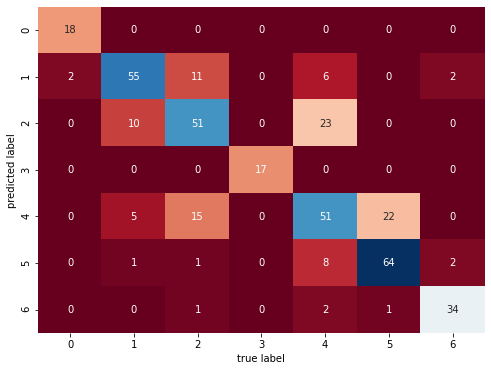

In [14]:
sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True)),
            square=False, annot=True, cmap='RdBu', cbar=False)
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [15]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, criterion='entropy')
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

Wall time: 3.4 s


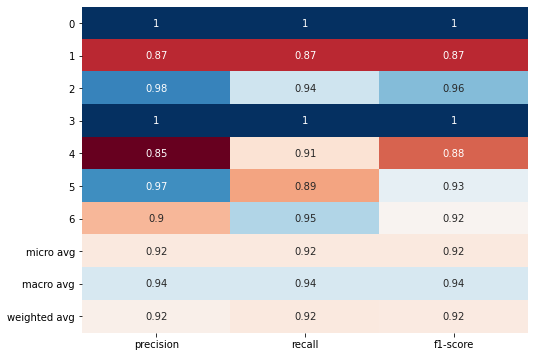

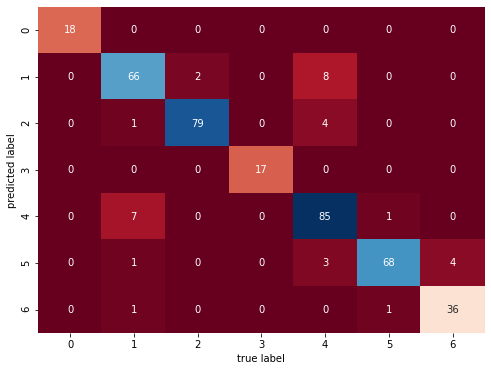

In [17]:
sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True)),
            square=False, annot=True, cmap='RdBu', cbar=False)
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()